# (Up)load sample image

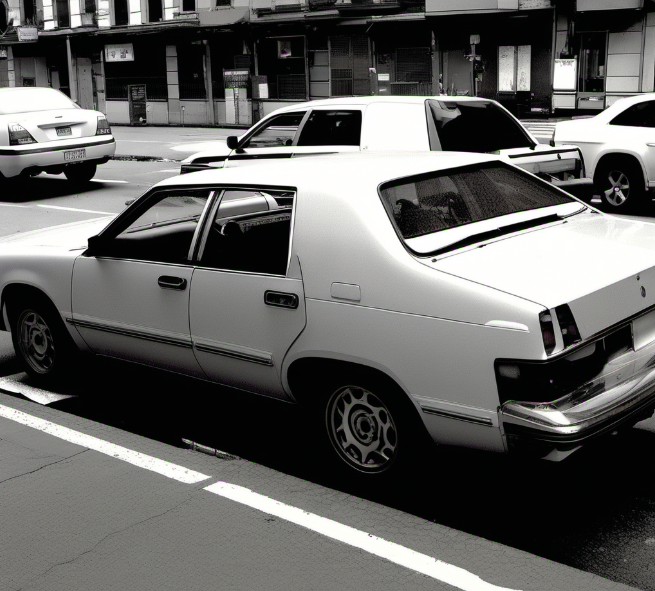

In [2]:
from PIL import Image

raw_image = Image.open("0_car.png").convert("RGB")
raw_image

# Image Classification

Source: https://huggingface.co/docs/transformers/tasks/image_classification#inference

In [4]:
from transformers import pipeline

classifier = pipeline("image-classification", model="google/vit-base-patch16-224")
classifier(raw_image)

[{'label': 'limousine, limo', 'score': 0.8467280864715576},
 {'label': 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
  'score': 0.08068051934242249},
 {'label': 'cab, hack, taxi, taxicab', 'score': 0.02606365457177162},
 {'label': 'grille, radiator grille', 'score': 0.011752964928746223},
 {'label': 'car wheel', 'score': 0.00872884877026081}]

# Image-to-Text

Source: https://huggingface.co/tasks/image-to-text#image-captioning-1

In [ ]:
from transformers import pipeline

captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
captioner(raw_image)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarnin

[{'generated_text': 'a white car parked on the side of the road'}]

# Object detection

Source: https://huggingface.co/ultralyticsplus/yolov8s

In [ ]:
#!pip install -U ultralyticsplus==0.0.14

Ultralytics YOLOv8.0.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


Class: car
Confidence: tensor([0.91840])

Class: car
Confidence: tensor([0.87766])

Class: car
Confidence: tensor([0.83676])

Class: car
Confidence: tensor([0.70730])



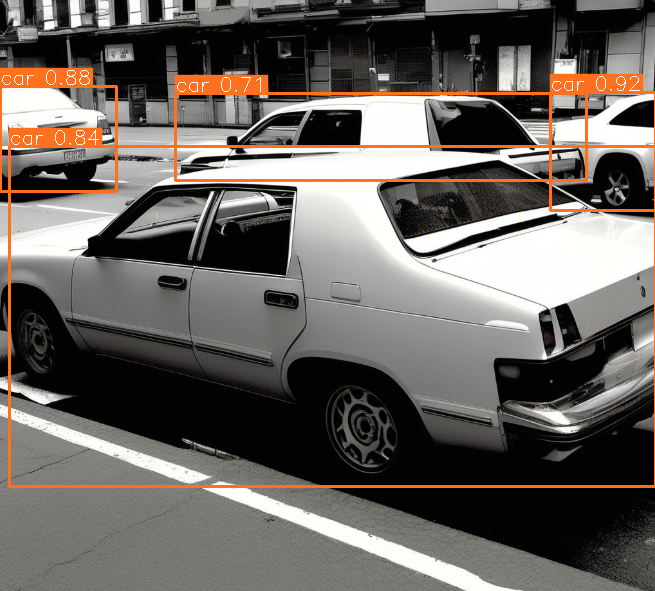

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('ultralyticsplus/yolov8s')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 100  # maximum number of detections per image

# perform inference
results = model.predict(raw_image)

known_classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
for i in range(len(results)):
    for j in range(len(results[i].boxes)):
        print("Class:", known_classes[results[i].boxes[j].cls.int().item()])
        print("Confidence:", results[i].boxes[j].conf)
        print()

# # observe results
render = render_result(model=model, image=raw_image, result=results[0])
render

---

# Text-to-image

Source: https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0


In [ ]:
#!pip install diffusers accelerate

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

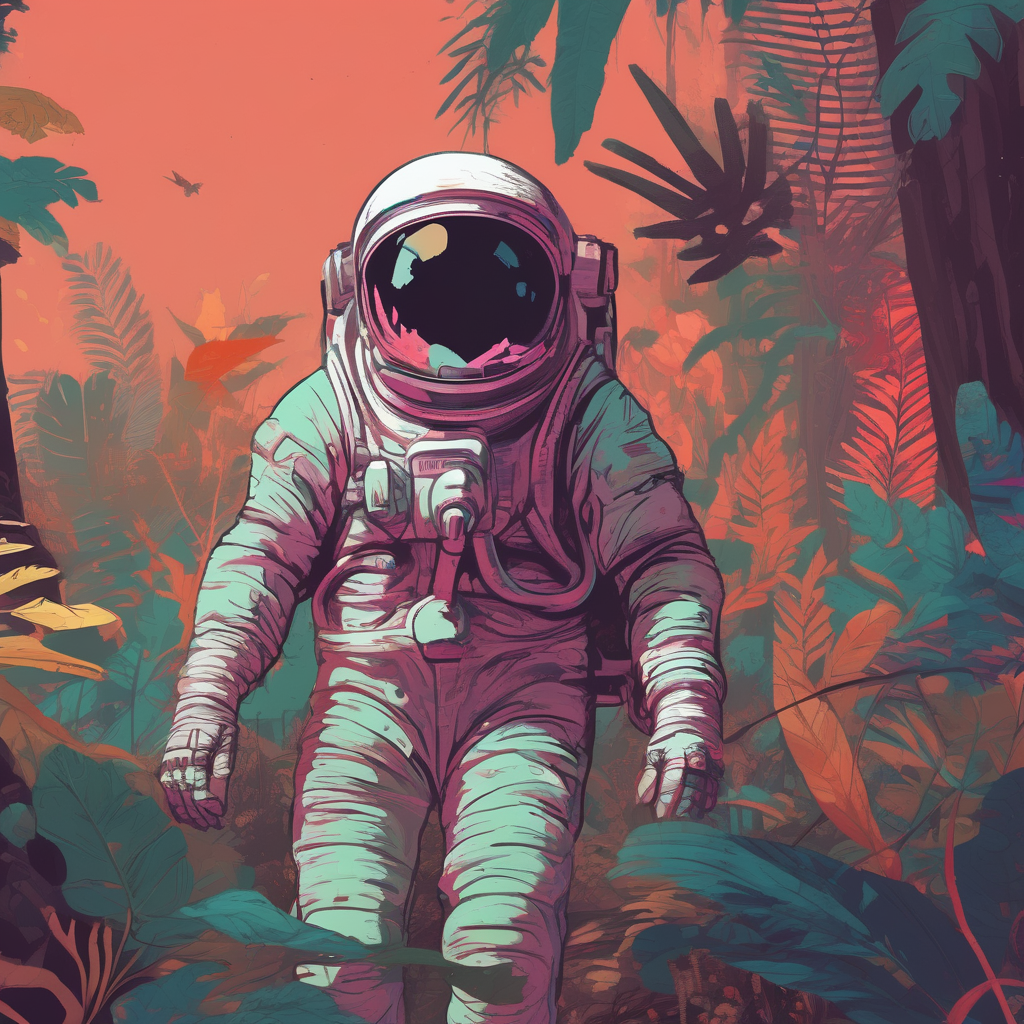

In [ ]:
import torch
from diffusers import AutoPipelineForText2Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'

pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to(device)

prompt = "Astronaut in a jungle, hot color palette, muted colors, detailed, 8k"
image = pipeline_text2image(prompt=prompt).images[0]
image

In [ ]:
prompt = "A car from LSUN cars dataset"
image = pipeline_text2image(prompt=prompt).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]